In [0]:
import os

import pandas as pd
import numpy as np
from numpy import savetxt

import keras 
from keras.models import Sequential
from keras.layers import Activation 
from keras.layers.core import Dense 
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.utils import to_categorical

%matplotlib inline
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

import itertools
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import random as rn

from google.colab import files

In [0]:
uploaded = files.upload()

Saving Pattern_1_COPD.csv to Pattern_1_COPD (4).csv


In [0]:
uploaded = files.upload()

Saving Pattern_0_Healthy.csv to Pattern_0_Healthy (4).csv


In [0]:
uploaded = files.upload()

Saving Test_Samples_COPD.csv to Test_Samples_COPD (4).csv


In [0]:
uploaded = files.upload()

Saving Test_Samples_Healthy.csv to Test_Samples_Healthy (4).csv


In [0]:
#For 5-fold cross_validations 

COPD_data = pd.read_csv('Pattern_1_COPD (4).csv', header=None)
COPD_data = pd.DataFrame.to_numpy(COPD_data)

HC_data = pd.read_csv('Pattern_0_Healthy (4).csv', header=None)
HC_data = pd.DataFrame.to_numpy(HC_data)

X_train = np.concatenate([COPD_data, HC_data], axis=0)

In [0]:
COPD_Tdata = pd.read_csv('Test_Samples_COPD (4).csv', header=None)
COPD_Tdata = pd.DataFrame.to_numpy(COPD_Tdata)

HC_Tdata = pd.read_csv('Test_Samples_Healthy (4).csv', header=None)
HC_Tdata = pd.DataFrame.to_numpy(HC_Tdata)

X_test = np.concatenate([COPD_Tdata, HC_Tdata], axis=0)

In [0]:
y_COPD= np.ones([32, 1])
y_HC= np.zeros([32, 1])

y_train = np.concatenate([y_COPD, y_HC], axis=0)


y_TCOPD= np.ones([8,])
y_THC= np.zeros([8,])

y_test = np.concatenate([y_TCOPD, y_THC], axis=0)

In [0]:
seed = 97
np.random.seed (seed)

rn.seed (seed)

In [0]:
#SVM classifier performance
svc = SVC(kernel = 'rbf',C=1000, gamma=0.1, probability = True)

y_pred = svc.fit(X_train, y_train).predict(X_test)
t = pd.DataFrame(svc.predict_proba(X_test))
svc.score(X_train,y_train), svc.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.984375, 0.9375)

In [0]:
model = Sequential([
    #Dropout(0.2, input_shape=(23,)), 
    Dense(4, input_shape=(23,), activation='sigmoid'),
    Dense(2, activation='sigmoid')
])

In [0]:
model.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train, batch_size=10, epochs=3000, shuffle=True, verbose=2)

In [0]:
predictions = model.predict(X_test, batch_size=5, verbose=0)

In [0]:
rounded_predictions = model.predict_classes(X_test, batch_size=10, verbose=0)

In [0]:
Network_Performance = np.mean(y_test==rounded_predictions)
Network_Performance

0.9375

In [0]:
cm = confusion_matrix(y_test, rounded_predictions)

In [0]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment='center',
                color='white' if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('Actual Medical Diagnosis')
    plt.xlabel('Neural Network Prediction')

Confusion matrix, without normalization
[[7 1]
 [0 8]]


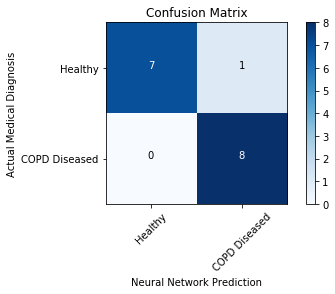

In [0]:
cm_plot_labels = ['Healthy', 'COPD Diseased']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [0]:
model.get_weights()

[array([[-0.40851423,  0.2504741 , -0.0784225 ,  0.18615729],
        [-0.51556295,  1.119573  , -0.35298812,  0.8938313 ],
        [ 0.7420976 ,  0.08223098,  0.88272   , -1.0059991 ],
        [-0.888565  ,  0.2702313 , -1.2994561 ,  1.0917995 ],
        [-0.381044  ,  0.9371715 , -0.55303097,  0.5019328 ],
        [-0.1633704 ,  0.83859366, -0.15840575,  0.38537383],
        [-0.08330081,  0.8538756 ,  0.33822203, -0.40218648],
        [ 0.5940458 ,  0.2335385 , -0.15103714, -0.1938266 ],
        [ 0.49949053,  0.12145364,  0.9827183 , -0.5382448 ],
        [ 0.9442638 , -0.38793653,  1.0415885 , -1.54856   ],
        [ 1.6940635 , -1.0308205 ,  1.694363  , -1.2975994 ],
        [ 1.1318691 , -0.38892528,  1.3564879 , -0.82872653],
        [ 0.7915663 ,  0.01690134,  0.9225525 , -0.9043075 ],
        [-0.02301565,  0.99885803, -0.26146108, -0.11679851],
        [-0.28271005,  1.1366271 , -0.05313346,  0.5439342 ],
        [ 0.2956866 ,  0.95167404, -0.24073   ,  0.40203124],
        

In [0]:
#Uploading new weights for model 

uploaded = files.upload()

Saving w1.csv to w1 (6).csv


In [0]:
uploaded = files.upload()

Saving w2.csv to w2 (4).csv


In [0]:
w1_data = pd.read_csv('w1 (6).csv', header=None)
w1_data = pd.DataFrame.to_numpy(w1_data)

w2_data = pd.read_csv('w2 (4).csv', header=None)
w2_data = pd.DataFrame.to_numpy(w2_data)

In [0]:
x=w1_data
x2 = w2_data

bias= np.array([-0.56436956,  0.8889141 , -0.5947547 ,  0.4538923])
bias2= np.array([-0.15800887, -0.7468287])

In [0]:
#Below is for 5-bit thresholding

In [0]:
print ('max: ', np.max(w1_data))
print ('avg: ', np.average(w1_data))
print ('min: ', np.min(w1_data))
print ('std: ', np.std(w1_data))
step = np.max(w1_data)/5
print('here are the thresholds for positive 5-bit:')
print (step)
print (2*step)
print (3*step)
print (4*step)
print (5*step)
stepn = np.min(w1_data)/5
print('here are the thresholds for negative 5-bit:')
print (stepn)
print (2*stepn)
print (3*stepn)
print (4*stepn)
print (5*stepn)

max:  1.694363
avg:  0.15177682826086955
min:  -1.54856
std:  0.646738014794857
here are the thresholds for positive 5-bit:
0.3388726
0.6777452
1.0166178000000001
1.3554904
1.694363
here are the thresholds for negative 5-bit:
-0.309712
-0.619424
-0.929136
-1.238848
-1.54856


In [0]:
# 5-bit thresholding (5 for positive and 5 for negative values)
#Layer 1: 

for i in range (23): 
  for j in range (4):
    if (0 < x[i,j] < step):
      x[i,j] = step
    elif (step < x[i,j] < 2*step):
      x[i,j] = 2*step
    elif (2*step < x[i,j] < 3*step):
      x[i,j] = 3*step
    elif (3*step < x[i,j] < 4*step):
      x[i,j] = 4*step
    elif (4*step < x[i,j]):
      x[i,j] = 5*step
    elif (stepn < x[i,j] < 0):
      x[i,j] = stepn
    elif (2*stepn < x[i,j] < stepn):
      x[i,j] = 2*stepn
    elif (3*stepn < x[i,j] < 2*stepn):
      x[i,j] = 3*stepn
    elif (4*stepn < x[i,j] < 3*stepn):
      x[i,j] = 4*stepn
    elif (x[i,j] < 4*stepn):
      x[i,j] = 5*stepn

print(x)

[[-0.619424   0.3388726 -0.309712   0.3388726]
 [-0.619424   1.3554904 -0.619424   1.0166178]
 [ 1.0166178  0.3388726  1.0166178 -1.238848 ]
 [-0.929136   0.3388726 -1.54856    1.3554904]
 [-0.619424   1.0166178 -0.619424   0.6777452]
 [-0.309712   1.0166178 -0.309712   0.6777452]
 [-0.309712   1.0166178  0.3388726 -0.619424 ]
 [ 0.6777452  0.3388726 -0.309712  -0.309712 ]
 [ 0.6777452  0.3388726  1.0166178 -0.619424 ]
 [ 1.0166178 -0.619424   1.3554904 -1.54856  ]
 [ 1.694363  -1.238848   1.694363  -1.54856  ]
 [ 1.3554904 -0.619424   1.694363  -0.929136 ]
 [ 1.0166178  0.3388726  1.0166178 -0.929136 ]
 [-0.309712   1.0166178 -0.309712  -0.309712 ]
 [-0.309712   1.3554904 -0.309712   0.6777452]
 [ 0.3388726  1.0166178 -0.309712   0.6777452]
 [-0.309712   1.0166178 -0.309712  -0.309712 ]
 [-0.309712   0.3388726  0.3388726  0.3388726]
 [-0.309712   0.6777452  0.6777452 -0.309712 ]
 [ 0.6777452  1.0166178 -0.309712  -0.619424 ]
 [-0.309712   0.6777452 -0.309712   0.3388726]
 [ 0.6777452 

In [0]:
# 5-bit thresholding (5 for positive and 5 for negative values)
#Layer 2: 

for i in range (4): 
  for j in range (2):
    if (0 < x2[i,j] < step):
      x2[i,j] = step
    elif (step < x2[i,j] < 2*step):
      x2[i,j] = 2*step
    elif (2*step < x2[i,j] < 3*step):
      x2[i,j] = 3*step
    elif (3*step < x2[i,j] < 4*step):
      x2[i,j] = 4*step
    elif (4*step < x2[i,j]):
      x2[i,j] = 5*step
    elif (stepn < x2[i,j] < 0):
      x2[i,j] = stepn
    elif (2*stepn < x2[i,j] < stepn):
      x2[i,j] = 2*stepn
    elif (3*stepn < x2[i,j] < 2*stepn):
      x2[i,j] = 3*stepn
    elif (4*stepn < x2[i,j] < 3*stepn):
      x2[i,j] = 4*stepn
    elif (x2[i,j] < 4*stepn):
      x2[i,j] = 5*stepn

print(x2)

[[-1.54856    1.3554904]
 [-0.929136  -1.54856  ]
 [-1.54856    1.3554904]
 [ 1.694363  -1.54856  ]]


In [0]:
#5-bit thresholding for biases

for i in range (4):
  if (0 < bias[i,] < step):
      bias[i,] = step
  elif (step < bias[i,] < 2*step):
      bias[i,] = 2*step
  elif (2*step < bias[i,] < 3*step):
      bias[i,] = 3*step
  elif (3*step < bias[i,] < 4*step):
      bias[i,] = 4*step
  elif (4*step < bias[i,]):
      bias[i,] = 5*step
  elif (stepn < bias[i,] < 0):
      bias[i,] = stepn
  elif (2*stepn < bias[i,] < stepn):
      bias[i,] = 2*stepn
  elif (3*stepn < bias[i,] < 2*stepn):
      bias[i,] = 3*stepn
  elif (4*stepn < bias[i,] < 3*stepn):
      bias[i,] = 4*stepn
  elif (bias[i,] < 4*stepn):
      bias[i,] = 5*stepn

i=0

for i in range (2):
  if (0 < bias2[i,] < step):
      bias2[i,] = step
  elif (step < bias2[i,] < 2*step):
      bias2[i,] = 2*step
  elif (2*step < bias2[i,] < 3*step):
      bias2[i,] = 3*step
  elif (3*step < bias2[i,] < 4*step):
      bias2[i,] = 4*step
  elif (4*step < bias2[i,]):
      bias2[i,] = 5*step
  elif (stepn < bias2[i,] < 0):
      bias2[i,] = stepn
  elif (2*stepn < bias2[i,] < stepn):
      bias2[i,] = 2*stepn
  elif (3*stepn < bias2[i,] < 2*stepn):
      bias2[i,] = 3*stepn
  elif (4*stepn < bias2[i,] < 3*stepn):
      bias2[i,] = 4*stepn
  elif (bias2[i,] < 4*stepn):
      bias2[i,] = 5*stepn 

print (bias)
print (bias2)

[-0.619424   1.0166178 -0.619424   0.6777452]
[-0.309712 -0.929136]


In [0]:
l=[]
l.append(x)
l.append(bias)
model.layers[0].set_weights(l)

l2=[]
l2.append(x2)
l2.append(bias2)
model.layers[1].set_weights(l2)

In [0]:
#5bit weights and biases

model.get_weights() 

[array([[-0.619424 ,  0.3388726, -0.309712 ,  0.3388726],
        [-0.619424 ,  1.3554904, -0.619424 ,  1.0166178],
        [ 1.0166178,  0.3388726,  1.0166178, -1.238848 ],
        [-0.929136 ,  0.3388726, -1.54856  ,  1.3554904],
        [-0.619424 ,  1.0166178, -0.619424 ,  0.6777452],
        [-0.309712 ,  1.0166178, -0.309712 ,  0.6777452],
        [-0.309712 ,  1.0166178,  0.3388726, -0.619424 ],
        [ 0.6777452,  0.3388726, -0.309712 , -0.309712 ],
        [ 0.6777452,  0.3388726,  1.0166178, -0.619424 ],
        [ 1.0166178, -0.619424 ,  1.3554904, -1.54856  ],
        [ 1.694363 , -1.238848 ,  1.694363 , -1.54856  ],
        [ 1.3554904, -0.619424 ,  1.694363 , -0.929136 ],
        [ 1.0166178,  0.3388726,  1.0166178, -0.929136 ],
        [-0.309712 ,  1.0166178, -0.309712 , -0.309712 ],
        [-0.309712 ,  1.3554904, -0.309712 ,  0.6777452],
        [ 0.3388726,  1.0166178, -0.309712 ,  0.6777452],
        [-0.309712 ,  1.0166178, -0.309712 , -0.309712 ],
        [-0.30

Confusion matrix, without normalization
[[7 1]
 [0 8]]


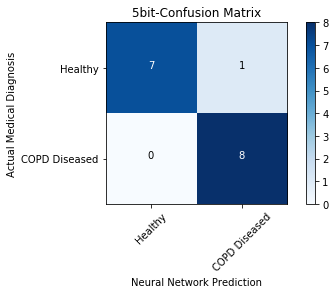

In [0]:
#5-bit confusion matrix with the updated weight and bias values 

model.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Five_bit_predictions = model.predict_classes(X_test, batch_size=10, verbose=0)

cm_FiveBit = confusion_matrix(y_test, Five_bit_predictions)

plot_confusion_matrix(cm_FiveBit, cm_plot_labels, title='5bit-Confusion Matrix')

In [0]:
Performance = np.mean(y_test==Five_bit_predictions)
print ('Five-bit performance:', Performance)

Five-bit performance: 0.9375


In [0]:
#Below is for 4-bit thresholding

In [0]:
print ('max: ', np.max(w1_data))
print ('avg: ', np.average(w1_data))
print ('min: ', np.min(w1_data))
print ('std: ', np.std(w1_data))
step = np.max(w1_data)/4
print('here are the thresholds for positive 4-bit:')
print (step)
print (2*step)
print (3*step)
print (4*step)

stepn = np.min(w1_data)/5
print('here are the thresholds for negative 4-bit:')
print (stepn)
print (2*stepn)
print (3*stepn)
print (4*stepn)

max:  2.6985340000000004
avg:  0.010142050000000019
min:  -2.675927
std:  1.1714721876614336
here are the thresholds for positive 4-bit:
0.6746335000000001
1.3492670000000002
2.0239005000000003
2.6985340000000004
here are the thresholds for negative 4-bit:
-0.5351854
-1.0703708
-1.6055562
-2.1407416


In [0]:
# 4-bit thresholding (4 for positive and 4 for negative values)
#Layer 1: 

for i in range (23): 
  for j in range (4):
    if (0 < x[i,j] < step):
      x[i,j] = step
    elif (step < x[i,j] < 2*step):
      x[i,j] = 2*step
    elif (2*step < x[i,j] < 3*step):
      x[i,j] = 3*step
    elif (3*step < x[i,j]):
      x[i,j] = 4*step
    elif (stepn < x[i,j] < 0):
      x[i,j] = stepn
    elif (2*stepn < x[i,j] < stepn):
      x[i,j] = 2*stepn
    elif (3*stepn < x[i,j] < 2*stepn):
      x[i,j] = 3*stepn
    elif (x[i,j] < 3*stepn):
      x[i,j] = 4*stepn

print(x)

[[ 0.6746335  1.349267  -0.5351854 -1.0703708]
 [ 0.6746335  0.6746335 -1.0703708 -1.0703708]
 [-1.0703708 -1.6055562  2.0239005  2.0239005]
 [ 2.0239005  2.698534  -1.6055562 -1.6055562]
 [ 1.349267   0.6746335 -1.0703708 -0.5351854]
 [-0.5351854 -0.5351854 -0.5351854 -1.0703708]
 [ 0.6746335 -1.0703708  0.6746335  1.349267 ]
 [-0.5351854 -0.5351854  0.6746335  1.349267 ]
 [-1.0703708 -0.5351854  1.349267   1.349267 ]
 [-1.6055562 -1.0703708  2.0239005  1.349267 ]
 [-2.1407416 -2.1407416  2.698534   2.698534 ]
 [-1.6055562 -2.1407416  2.0239005  2.0239005]
 [-1.6055562 -0.5351854  2.0239005  2.0239005]
 [-0.5351854  0.6746335 -0.5351854 -0.5351854]
 [ 1.349267   0.6746335 -1.0703708 -0.5351854]
 [ 1.349267   1.349267  -0.5351854 -0.5351854]
 [ 0.6746335  0.6746335 -0.5351854  0.6746335]
 [-0.5351854 -0.5351854  0.6746335  0.6746335]
 [ 0.6746335 -0.5351854  0.6746335  0.6746335]
 [-0.5351854 -0.5351854 -0.5351854  0.6746335]
 [-0.5351854  0.6746335 -0.5351854 -0.5351854]
 [ 2.0239005 

In [0]:
# 4-bit thresholding (4 for positive and 4 for negative values)
#Layer 2: 

for i in range (4): 
  for j in range (2):
    if (0 < x2[i,j] < step):
      x2[i,j] = step
    elif (step < x2[i,j] < 2*step):
      x2[i,j] = 2*step
    elif (2*step < x2[i,j] < 3*step):
      x2[i,j] = 3*step
    elif (3*step < x2[i,j]):
      x2[i,j] = 4*step
    elif (stepn < x2[i,j] < 0):
      x2[i,j] = stepn
    elif (2*stepn < x2[i,j] < stepn):
      x2[i,j] = 2*stepn
    elif (3*stepn < x2[i,j] < 2*stepn):
      x2[i,j] = 3*stepn
    elif (x2[i,j] < 3*stepn):
      x2[i,j] = 4*stepn

print(x2)

[[ 2.0239005 -1.6055562]
 [ 1.349267  -2.1407416]
 [-2.1407416  2.0239005]
 [-2.1407416  1.349267 ]]


In [0]:
#4-bit thresholding biases

bias= np.array([0.19141035,	0.43812883,	-0.43519613,	-0.36285147])
bias2= np.array([-1.0543804,	-0.7916761])

for i in range (4):
  if (0 < bias[i,] < step):
      bias[i,] = step
  elif (step < bias[i,] < 2*step):
      bias[i,] = 2*step
  elif (2*step < bias[i,] < 3*step):
      bias[i,] = 3*step
  elif (3*step < bias[i,]):
      bias[i,] = 4*step
  elif (stepn < bias[i,] < 0):
      bias[i,] = stepn
  elif (2*stepn < bias[i,] < stepn):
      bias[i,] = 2*stepn
  elif (3*stepn < bias[i,] < 2*stepn):
      bias[i,] = 3*stepn
  elif (bias[i,] < 3*stepn):
      bias[i,] = 4*stepn

i=0

for i in range (2):
  if (0 < bias2[i,] < step):
      bias2[i,] = step
  elif (step < bias2[i,] < 2*step):
      bias2[i,] = 2*step
  elif (2*step < bias2[i,] < 3*step):
      bias2[i,] = 3*step
  elif (3*step < bias2[i,]):
      bias2[i,] = 4*step
  elif (stepn < bias2[i,] < 0):
      bias2[i,] = stepn
  elif (2*stepn < bias2[i,] < stepn):
      bias2[i,] = 2*stepn
  elif (3*stepn < bias2[i,] < 2*stepn):
      bias2[i,] = 3*stepn
  elif (bias2[i,] < 3*stepn):
      bias2[i,] = 4*stepn 

print (bias)
print (bias2)

[ 0.6746335  0.6746335 -0.5351854 -0.5351854]
[-1.0703708 -1.0703708]


Confusion matrix, without normalization
[[7 1]
 [0 8]]


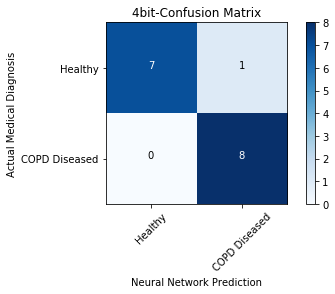

In [0]:
#4-bit confusion matrix

model.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Four_bit_predictions = model.predict_classes(X_test, batch_size=10, verbose=0)

cm_FourBit = confusion_matrix(y_test, Four_bit_predictions)

plot_confusion_matrix(cm_FourBit, cm_plot_labels, title='4bit-Confusion Matrix')

In [0]:
Performance = np.mean(y_test==Four_bit_predictions)
print ('Four-bit performance:', Performance)

Four-bit performance: 0.9375


In [0]:
# Trained network parameters/weights extraction for the hardware

weight = torch.tensor(w1, dtype=torch.float, device='cpu')  
weight=weight.numpy()

np.savetxt('SNN80-SG_W1.csv', weight, delimiter=',',fmt='%1.2f')
files.download('SNN80-SG_W1.csv')

weight2 = torch.tensor(w2, dtype=torch.float, device='cpu')  
weight2=weight2.numpy()

np.savetxt('SNN80-SG_W2.csv', weight2, delimiter=',',fmt='%1.2f')
files.download('SNN80-SG_W2.csv')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [0]:
# For removing the non-zero weights

for i in range (nb_inputs):
  for j in range (nb_hidden):
    w1[i,j] = torch.clamp(w1[i,j],0,1,out=None) 


# OR
#w1= torch.abs(w1)

In [0]:
# Saving the exact dataset (train/test) used for training SNN for the hardware implementations  

np.savetxt('SNN80-train.csv', pd.DataFrame.to_numpy(X_train), delimiter=',',fmt='%1.0f')
files.download('SNN80-train.csv')

np.savetxt('SNN80-train_label.csv', y_train, delimiter=',',fmt='%1.0f')
files.download('SNN80-train_label.csv')

np.savetxt('SNN80-test.csv', pd.DataFrame.to_numpy(X_test), delimiter=',',fmt='%1.0f')
files.download('SNN80-test.csv')

np.savetxt('SNN80-test_label.csv', y_test, delimiter=',',fmt='%1.0f')
files.download('SNN80-test_label.csv')